# IEEE Competition

In this notebook we will walkthrough the steps of exploring data and cleaning it to make it ready for the next steps of preprocessing and modeling.

We will explore each column in both tables:
- [`train.csv`](#Train-Data)

- [`test.csv`](#Test-data)

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Train Data

In [142]:
train = pd.read_csv('train.csv', index_col='Unnamed: 0')

In [143]:
train.head()

,age_years,workclass,final_weight,education,educational-num,marital-status,job_title,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country_of_origin,income
0,32.0,Private,408328,seventh_eighth_grade,4,Married-civ-spouse,skilled_artisan,Husband,White,Male,0.0,0.0,40.0,United-States,0
1,68.0,Self-emp-not-inc,140892,masters_degree,14,Married-civ-spouse,logistics_transport,Husband,White,Male,0.0,0.0,15.0,United-States,0
2,50.0,Private,146015,high_school_graduate,9,Married-civ-spouse,skilled_artisan,Husband,White,Male,0.0,0.0,40.0,United-States,0
3,28.0,Private,44216,high_school_graduate,9,Never-married,security_personnel,Unmarried,Amer-Indian-Eskimo,Female,0.0,0.0,40.0,United-States,0
4,43.0,Private,171888,some_college,10,Divorced,administrative_assistant,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0


In [144]:
train.rename(columns={
        'educational-num': 'educational_num',
        'hours-per-week': 'hours_per_week',
        'capital-gain': 'capital_gain',
        'capital-loss': 'capital_loss',
        'marital-status': 'marital_status',
    }, inplace=True)

In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25953 entries, 0 to 25952
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age_years          25552 non-null  float64
 1   workclass          25486 non-null  object 
 2   final_weight       25953 non-null  int64  
 3   education          24495 non-null  object 
 4   educational_num    25953 non-null  int64  
 5   marital_status     25953 non-null  object 
 6   job_title          25953 non-null  object 
 7   relationship       25953 non-null  object 
 8   race               25692 non-null  object 
 9   gender             25953 non-null  object 
 10  capital_gain       25953 non-null  float64
 11  capital_loss       25953 non-null  float64
 12  hours_per_week     25770 non-null  float64
 13  country_of_origin  25953 non-null  object 
 14  income             25953 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 3.2+ MB


At first let's know what are the columns we have:

- `'age_years'` : The age of the individual in years.

- `'workclass'` : The employment type or work category the individual belongs to.

- `'final_weight'` : A weighting factor indicating the significance of the individual's representation in the dataset.

- `'education'` : The highest level of education attained by the individual.

- `'educational_num'` : A numerical representation of the individual's educational level.

- `'marital_status'` : The individual's current marital situation (e.g., single, married, divorced).

- `'job_title'` : The individual's job or occupation title.

- `'relationship'` : The role of the individual within their family (e.g., spouse, child).

- `'race'` : The self-identified racial group of the individual.

- `'gender'` : The gender of the individual, usually male or female.

- `'capital_gain'` : Income from investments or other capital sources.

- `'capital_loss'` : Financial losses incurred from investments or other sources.

- `'hours_per_week'` : The number of hours the individual works in a typical week.

- `'country_of_origin'` : The country where the individual was born or is originally from.

- `'income'` : The target variable indicating whether the individual’s income is above or below a certain threshold.

In [146]:
# We will need this function later to check if a string value is NaN

def isnan(x):
    if x == 'nan':
        return True
    else:
        return False

In [147]:
train.isna().sum()

age_years             401
workclass             467
final_weight            0
education            1458
educational_num         0
marital_status          0
job_title               0
relationship            0
race                  261
gender                  0
capital_gain            0
capital_loss            0
hours_per_week        183
country_of_origin       0
income                  0
dtype: int64

In [148]:
train.describe()

,age_years,final_weight,educational_num,capital_gain,capital_loss,hours_per_week,income
count,25552.000000,2.595300e+04,25953.000000,25953.000000,25953.000000,25770.000000,25953.000000
mean,39.637257,1.890125e+05,10.341309,1812.648636,116.793003,41.247070,0.361076
std,14.805277,1.051493e+05,2.595574,10556.289749,492.895893,12.387398,0.480322
min,-3.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,29.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,38.000000,1.772160e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,49.000000,2.363910e+05,13.000000,0.000000,0.000000,45.000000,1.000000
max,1000.000000,1.484705e+06,16.000000,117998.820000,4878.720000,99.000000,1.000000


In [149]:
train.describe(include='O')

,workclass,education,marital_status,job_title,relationship,race,gender,country_of_origin
count,25486,24495,25953,25953,25953,25692,25953,25953
unique,12,16,7,15,6,5,2,42
top,Private,high_school_graduate,Married-civ-spouse,specialized_professional,Husband,White,Male,United-States
freq,17427,7466,13529,3786,11945,22188,18024,23380


### Age Column

In [150]:
train.age_years.value_counts()

age_years
 36.0      723
 35.0      711
 37.0      708
 38.0      706
 33.0      700
 34.0      692
 41.0      690
 39.0      680
 42.0      665
 40.0      659
 32.0      657
 46.0      656
 31.0      653
 47.0      644
 43.0      641
 45.0      627
 29.0      619
 44.0      611
 28.0      609
 30.0      603
 23.0      583
 24.0      582
 27.0      576
 25.0      544
 26.0      539
 51.0      528
 50.0      512
 22.0      510
 48.0      489
 49.0      485
 21.0      481
 19.0      480
 20.0      470
 53.0      410
 52.0      409
 18.0      383
 55.0      372
 54.0      350
 57.0      304
 58.0      301
 59.0      297
 56.0      295
 17.0      253
 61.0      244
 60.0      244
 62.0      206
 64.0      188
 63.0      178
 65.0      161
 67.0      125
 66.0      121
 68.0       96
 69.0       82
 70.0       71
 72.0       59
 71.0       56
 73.0       53
 74.0       36
 75.0       35
 76.0       34
 77.0       32
 90.0       25
 80.0       19
 81.0       16
 78.0       15
 79.0       14


In [151]:
train[train.age_years == 0]

,age_years,workclass,final_weight,education,educational_num,marital_status,job_title,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
5141,0.0,Private,195636,bachelors_degree,13,Never-married,specialized_professional,Not-in-family,White,Female,0.0,0.0,55.0,United-States,0


In [152]:
train[train.age_years == 1000]

,age_years,workclass,final_weight,education,educational_num,marital_status,job_title,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
707,1000.0,Private,103435,high_school_graduate,9,Married-civ-spouse,logistics_transport,Husband,White,Male,0.0,0.0,40.0,United-States,0


In [153]:
train[train.age_years == 0.2]

,age_years,workclass,final_weight,education,educational_num,marital_status,job_title,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
4834,0.2,Private,185433,some_college,10,Married-civ-spouse,administrative_assistant,Wife,Black,Female,0.0,0.0,40.0,United-States,1


In [154]:
train[train.age_years == 325]

,age_years,workclass,final_weight,education,educational_num,marital_status,job_title,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
13191,325.0,Private,198751,masters_degree,14,Never-married,general_service_worker,Not-in-family,Amer-Indian-Eskimo,Male,0.0,0.0,40.0,United-States,0


In [155]:
len(train[train.age_years > 90])

2

In [156]:
len(train[train.age_years < 15])


3

In [157]:
train.drop(train[train.age_years > 90].index, inplace=True)

In [158]:
train.drop(train[train.age_years < 15].index, inplace=True)

<Axes: ylabel='age_years'>

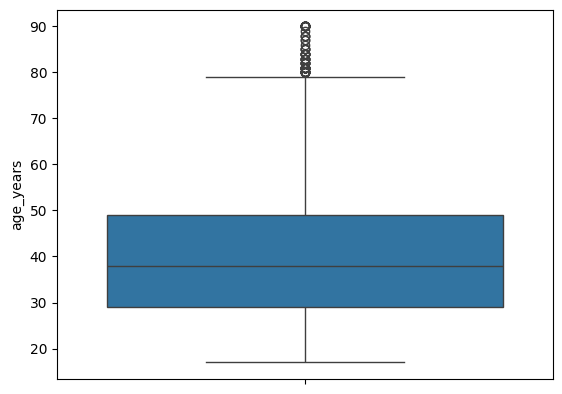

In [159]:
sns.boxplot(train.age_years)

<Axes: xlabel='age_years', ylabel='Density'>

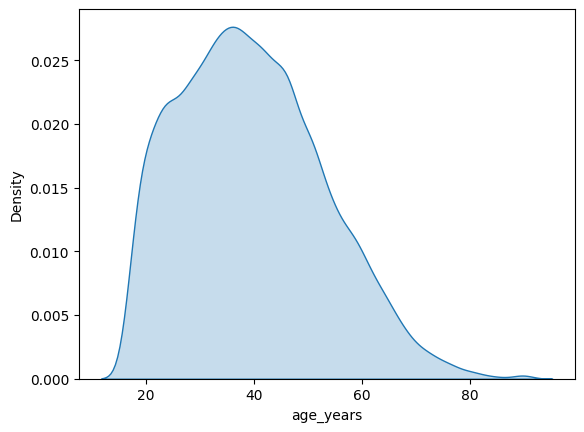

In [160]:
sns.kdeplot(train.age_years, fill=True)

In [161]:
train['age_years'].isna().sum()

401

In [162]:
train[train['age_years'].isna()].head()

,age_years,workclass,final_weight,education,educational_num,marital_status,job_title,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
51,NaN,Private,30875,bachelors_degree,13,Divorced,business_development,Unmarried,White,Female,0.00,0.0,40.0,United-States,1
72,NaN,Self-emp-inc,77764,bachelors_degree,13,Married-civ-spouse,specialized_professional,Husband,White,Male,0.00,0.0,60.0,United-States,1
76,NaN,Private,335005,some_college,10,Married-civ-spouse,security_personnel,Husband,White,Male,3701.66,0.0,40.0,United-States,0
86,NaN,State-gov,33658,masters_degree,14,Married-civ-spouse,specialized_professional,Husband,White,Male,9071.84,0.0,50.0,United-States,1
155,NaN,Private,33155,high_school_graduate,9,Married-civ-spouse,skilled_artisan,Husband,White,Male,0.00,0.0,85.0,United-States,0


We can deal with missing values and fill them with the mean of the column with their group of marital status and relationship in their families.

In [163]:
train.groupby(['marital_status', 'relationship'])['age_years'].transform('mean').apply(lambda x: round(x, 0))

0        44.0
1        44.0
2        44.0
3        32.0
4        45.0
5        45.0
6        44.0
7        42.0
8        44.0
9        44.0
10       44.0
11       44.0
12       32.0
13       44.0
14       24.0
15       44.0
16       44.0
17       45.0
18       44.0
19       32.0
20       44.0
21       44.0
22       44.0
23       44.0
24       44.0
25       44.0
26       32.0
27       24.0
28       44.0
29       35.0
30       24.0
31       24.0
32       44.0
33       28.0
34       45.0
35       40.0
36       32.0
37       44.0
38       44.0
39       32.0
40       44.0
41       44.0
42       24.0
43       32.0
44       32.0
45       44.0
46       44.0
47       32.0
48       44.0
49       24.0
50       44.0
51       42.0
52       45.0
53       44.0
54       44.0
55       44.0
56       44.0
57       44.0
58       32.0
59       32.0
60       42.0
61       44.0
62       44.0
63       44.0
64       42.0
65       44.0
66       44.0
67       24.0
68       39.0
69       32.0
70       40.0
71    

In [164]:
group = train.groupby(['marital_status', 'relationship'])['age_years']
train['age_years'] = train['age_years'].fillna(group.transform(lambda x: round(x.mean(), 0)))

In [165]:
train.age_years.isna().sum()

0

### Workclass column

In [166]:
train['workclass'].value_counts(dropna=False)

workclass
Private             17423
Self-emp-not-inc     2065
Local-gov            1667
?                    1333
Self-emp-inc         1067
State-gov            1065
Federal-gov           845
NaN                   467
Without-pay             8
Never-worked            4
private                 2
Privte                  1
Stategov                1
Name: count, dtype: int64

In [167]:
train['workclass'] = train['workclass'].astype('str')

In [168]:
def fix_workclass(row):
    row = row.strip().lower().replace('-', '_')
    if row == '?':
        return 'unknown'
    elif row == "privte":
        return 'private'
    elif row == "stategov":
        return 'state_gov'
    else:
        return row

In [169]:
train['workclass'] = train['workclass'].apply(fix_workclass)

In [170]:
train.workclass.value_counts()

workclass
private             17426
self_emp_not_inc     2065
local_gov            1667
unknown              1333
self_emp_inc         1067
state_gov            1066
federal_gov           845
nan                   467
without_pay             8
never_worked            4
Name: count, dtype: int64

In [171]:
train.workclass.apply(isnan).sum()

467

In [172]:
train[train.workclass.apply(isnan)].head()

,age_years,workclass,final_weight,education,educational_num,marital_status,job_title,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
69,38.0,nan,140117,some_college,10,Never-married,general_service_worker,Not-in-family,White,Female,0.0,0.0,20.0,United-States,0
87,50.0,nan,281504,some_college,10,Married-civ-spouse,unknown,Husband,White,Male,0.0,0.0,40.0,United-States,0
104,27.0,nan,68393,bachelors_degree,13,Never-married,administrative_assistant,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0
141,29.0,nan,103628,some_college,10,Married-civ-spouse,administrative_assistant,Wife,White,Female,0.0,0.0,40.0,United-States,1
186,53.0,nan,93449,professional_school,15,Married-civ-spouse,specialized_professional,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,India,1


An Idea is to fill the missing values with the mode of each group of `job_title` column.

In [173]:
train.groupby('job_title')['workclass'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

job_title
administrative_assistant        private
agriculture_worker              private
business_development            private
corporate_executive             private
domestic_worker                 private
general_service_worker          private
logistics_transport             private
machine_operator                private
manual_labor                    private
military_personnel          federal_gov
security_personnel            local_gov
skilled_artisan                 private
specialized_professional        private
technical_support               private
unknown                         unknown
Name: workclass, dtype: object

In [174]:
train.groupby('workclass')['job_title'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

workclass
federal_gov         administrative_assistant
local_gov           specialized_professional
nan                      corporate_executive
never_worked                         unknown
private                  corporate_executive
self_emp_inc             corporate_executive
self_emp_not_inc             skilled_artisan
state_gov           specialized_professional
unknown                              unknown
without_pay               agriculture_worker
Name: job_title, dtype: object

Then we can put `nan` values equal to `private` since it is the most common value in the column.

In [175]:
def fix_workclass(row):
    row = row.strip().lower().replace('-', '_')
    if row == '?':
        return 'unknown'
    elif row == "privte":
        return 'private'
    elif row == "stategov":
        return 'state_gov'
    elif row == 'nan':
        return 'private'
    else:
        return row

In [176]:
train.workclass = train.workclass.apply(fix_workclass)
train.workclass.value_counts()

workclass
private             17893
self_emp_not_inc     2065
local_gov            1667
unknown              1333
self_emp_inc         1067
state_gov            1066
federal_gov           845
without_pay             8
never_worked            4
Name: count, dtype: int64

Now it's all good here.

### Final weight column

In [177]:
train['final_weight'].nunique()

17954

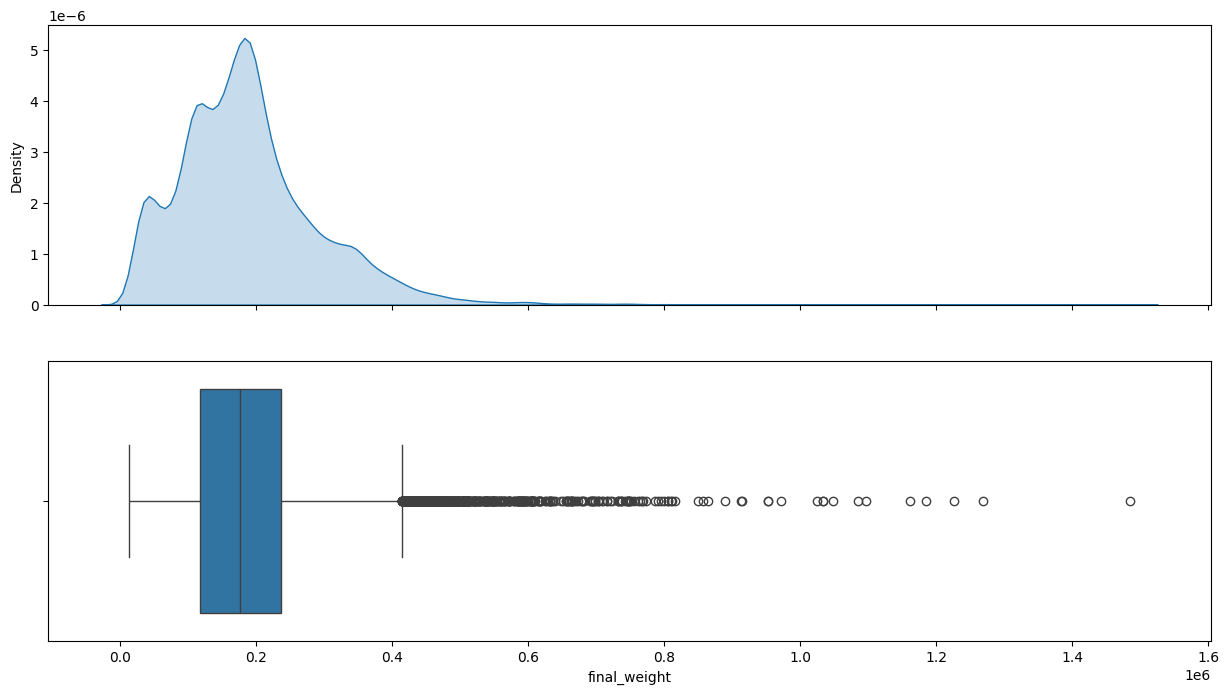

1.4491842749056103


In [178]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
sns.kdeplot(train.final_weight, fill=True, ax=ax[0])
sns.boxplot(x=train.final_weight, ax=ax[1])
plt.show()
print(train.final_weight.skew())

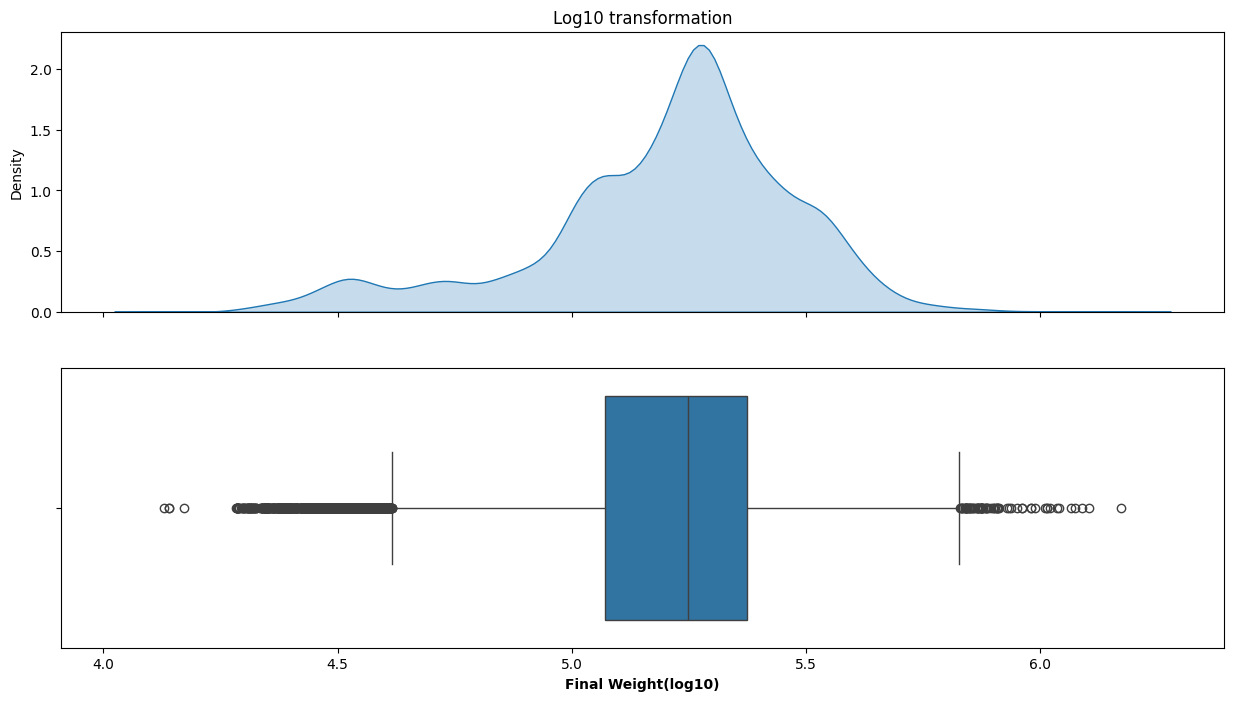

-0.8408554420599657


In [179]:
new_final_weight = np.log10(train.final_weight)
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
sns.kdeplot(new_final_weight, fill=True, ax=ax[0])
sns.boxplot(x=new_final_weight, ax=ax[1])
ax[0].set_title('Log10 transformation')
ax[1].set_xlabel('Final Weight(log10)',fontweight='bold')
plt.show()
print(new_final_weight.skew())

In [180]:
train.final_weight.isna().sum()

0

In [181]:
train['final_weight'] = np.log10(train.final_weight)

Now `final_weight` column is claen and ready for analysis.

### Education column

In [182]:
train.education.value_counts()

education
high_school_graduate    7465
some_college            5328
bachelors_degree        4543
masters_degree          1581
associate_vocational    1073
associate_academic       787
eleventh_grade           777
tenth_grade              589
professional_school      553
seventh_eighth_grade     422
doctorate_degree         410
ninth_grade              325
twelfth_grade            275
fifth_sixth_grade        211
first_fourth_grade       116
preschool                 35
Name: count, dtype: int64

In [183]:
train.groupby('education')['educational_num'].value_counts()

education             educational_num
associate_academic    12                  787
associate_vocational  11                 1073
bachelors_degree      13                 4543
doctorate_degree      16                  410
eleventh_grade        7                   777
fifth_sixth_grade     3                   211
first_fourth_grade    2                   116
high_school_graduate  9                  7465
masters_degree        14                 1581
ninth_grade           5                   325
preschool             1                    35
professional_school   15                  553
seventh_eighth_grade  4                   422
some_college          10                 5328
tenth_grade           6                   589
twelfth_grade         8                   275
Name: count, dtype: int64

In [184]:
train.education.isna().sum()

1458

In [185]:
train['educational_num'].isna().sum()

0

In [186]:
mapping = train.set_index('educational_num')['education'].to_dict()
mapping

{4: 'seventh_eighth_grade',
 14: 'masters_degree',
 9: 'high_school_graduate',
 10: 'some_college',
 13: 'bachelors_degree',
 2: 'first_fourth_grade',
 11: 'associate_vocational',
 7: 'eleventh_grade',
 16: 'doctorate_degree',
 12: 'associate_academic',
 3: 'fifth_sixth_grade',
 1: 'preschool',
 6: 'tenth_grade',
 5: 'ninth_grade',
 15: 'professional_school',
 8: 'twelfth_grade'}

In [187]:
train['education'] = train['educational_num'].map(mapping)

In [188]:
train['education'].isna().sum()

0

In [189]:
train['education'].value_counts()

education
high_school_graduate    7896
some_college            5635
bachelors_degree        4806
masters_degree          1694
associate_vocational    1149
associate_academic       833
eleventh_grade           827
tenth_grade              628
professional_school      591
seventh_eighth_grade     443
doctorate_degree         431
ninth_grade              343
twelfth_grade            292
fifth_sixth_grade        222
first_fourth_grade       121
preschool                 37
Name: count, dtype: int64

Now `education` and `educational_num` columns are clean and ready for analysis.

### Marital status column

In [190]:
train.marital_status.value_counts(dropna=False)

marital_status
Married-civ-spouse       13526
Never-married             7462
Divorced                  3224
Widowed                    725
Separated                  700
Married-spouse-absent      289
Married-AF-spouse           22
Name: count, dtype: int64

In [191]:
def fix_marital_status(row):
    row = row.strip().lower().replace('-', '_')
    return row

In [192]:
train['marital_status'] = train['marital_status'].apply(fix_marital_status)

In [193]:
train.marital_status.value_counts(dropna=False)

marital_status
married_civ_spouse       13526
never_married             7462
divorced                  3224
widowed                    725
separated                  700
married_spouse_absent      289
married_af_spouse           22
Name: count, dtype: int64

In [194]:
train.head()

,age_years,workclass,final_weight,education,educational_num,marital_status,job_title,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,32.0,private,5.611009,seventh_eighth_grade,4,married_civ_spouse,skilled_artisan,Husband,White,Male,0.0,0.0,40.0,United-States,0
1,68.0,self_emp_not_inc,5.148886,masters_degree,14,married_civ_spouse,logistics_transport,Husband,White,Male,0.0,0.0,15.0,United-States,0
2,50.0,private,5.164397,high_school_graduate,9,married_civ_spouse,skilled_artisan,Husband,White,Male,0.0,0.0,40.0,United-States,0
3,28.0,private,4.645579,high_school_graduate,9,never_married,security_personnel,Unmarried,Amer-Indian-Eskimo,Female,0.0,0.0,40.0,United-States,0
4,43.0,private,5.235246,some_college,10,divorced,administrative_assistant,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0


In [195]:
train['married'] = train['marital_status'].apply(lambda x: 1 if x in ['married_civ_spouse', 'married_spouse_absent', 'married_af_spouse'] else 0)
train.married.value_counts() 

married
1    13837
0    12111
Name: count, dtype: int64

In [196]:
train.marital_status.isna().sum()

0

Actually there is nothing we can do with `marital_status` column, it is clean and ready for analysis.

### Job title column

In [197]:
train.job_title.value_counts(dropna=False)

job_title
specialized_professional    3785
corporate_executive         3780
skilled_artisan             3146
business_development        3009
administrative_assistant    2817
general_service_worker      2206
machine_operator            1457
unknown                     1365
logistics_transport         1224
manual_labor                 958
technical_support            821
agriculture_worker           731
security_personnel           534
domestic_worker              108
military_personnel             7
Name: count, dtype: int64

In [198]:
train.job_title.isna().sum()

0

Also `job_title` doesn't need any cleaning, it is ready for analysis.

### Relationship column

In [199]:
train.relationship.value_counts(dropna=False)

relationship
Husband           11943
Not-in-family      6121
Own-child          3413
Unmarried          2367
Wife               1435
Other-relative      669
Name: count, dtype: int64

In [200]:
def fix_relationship(row):
    row = row.strip().lower()
    row = row.replace('-', '_')
    return row

In [201]:
train.relationship = train.relationship.apply(fix_relationship)

In [202]:
train.relationship.value_counts(dropna=False)

relationship
husband           11943
not_in_family      6121
own_child          3413
unmarried          2367
wife               1435
other_relative      669
Name: count, dtype: int64

It's all good here with `relationship` column, it is ready for analysis.

### Race column

In [203]:
train.race.value_counts(dropna=False)

race
White                 22185
Black                  2219
Asian-Pac-Islander      835
NaN                     261
Amer-Indian-Eskimo      230
Other                   218
Name: count, dtype: int64

In [204]:
def fix_race(row):
    row = row.strip().lower()
    row.replace('-', '_')
    return row

In [205]:
train.race = train.race.astype('str')
train.race = train.race.apply(fix_race)
train.race.apply(isnan).sum()

261

In [206]:
train.race.value_counts(dropna=False)

race
white                 22185
black                  2219
asian-pac-islander      835
nan                     261
amer-indian-eskimo      230
other                   218
Name: count, dtype: int64

In [207]:
train.race.mode()

0    white
Name: race, dtype: object

In [208]:
train.groupby('race')['country_of_origin'].value_counts()

race                country_of_origin         
amer-indian-eskimo  United-States                   220
                    Mexico                            5
                    Columbia                          1
                    Germany                           1
                    Philippines                       1
                    Puerto-Rico                       1
                    South                             1
asian-pac-islander  United-States                   243
                    Philippines                     160
                    India                            71
                    China                            67
                    ?                                65
                    South                            61
                    Vietnam                          39
                    Taiwan                           35
                    Japan                            31
                    Thailand                         14
 

In [209]:
train.groupby('country_of_origin')['race'].value_counts()

country_of_origin           race              
?                           white                   309
                            asian-pac-islander       65
                            black                    65
                            other                    12
                            nan                       7
Cambodia                    asian-pac-islander       10
                            white                     2
                            black                     1
Canada                      white                   104
                            other                     2
                            asian-pac-islander        1
China                       asian-pac-islander       67
                            white                     2
Columbia                    white                    38
                            other                     5
                            amer-indian-eskimo        1
Cuba                        white                    72
 

Then we will put `nan` values equal to `white` since it is the most common value in the column

In [210]:
def fix_race(row):
    row = row.lower()
    row = row.replace('nan', train.race.mode().loc[0]).replace('-', '_')
    return row

In [211]:
train.race = train.race.apply(fix_race)

In [212]:
train.race.apply(isnan).sum()

0

In [213]:
train.race.value_counts()

race
white                 22446
black                  2219
asian_pac_islander      835
amer_indian_eskimo      230
other                   218
Name: count, dtype: int64

I guess `race` column now is clean and ready for analysis.

### Gender column

In [214]:
train.gender.value_counts(dropna=False)

gender
Male      18021
Female     7927
Name: count, dtype: int64

In [215]:
train.gender = train.gender.str.lower()

In [216]:
train.head()

,age_years,workclass,final_weight,education,educational_num,marital_status,job_title,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income,married
0,32.0,private,5.611009,seventh_eighth_grade,4,married_civ_spouse,skilled_artisan,husband,white,male,0.0,0.0,40.0,United-States,0,1
1,68.0,self_emp_not_inc,5.148886,masters_degree,14,married_civ_spouse,logistics_transport,husband,white,male,0.0,0.0,15.0,United-States,0,1
2,50.0,private,5.164397,high_school_graduate,9,married_civ_spouse,skilled_artisan,husband,white,male,0.0,0.0,40.0,United-States,0,1
3,28.0,private,4.645579,high_school_graduate,9,never_married,security_personnel,unmarried,amer_indian_eskimo,female,0.0,0.0,40.0,United-States,0,0
4,43.0,private,5.235246,some_college,10,divorced,administrative_assistant,not_in_family,white,female,0.0,0.0,40.0,United-States,0,0


### Capital gain and capital loss columns

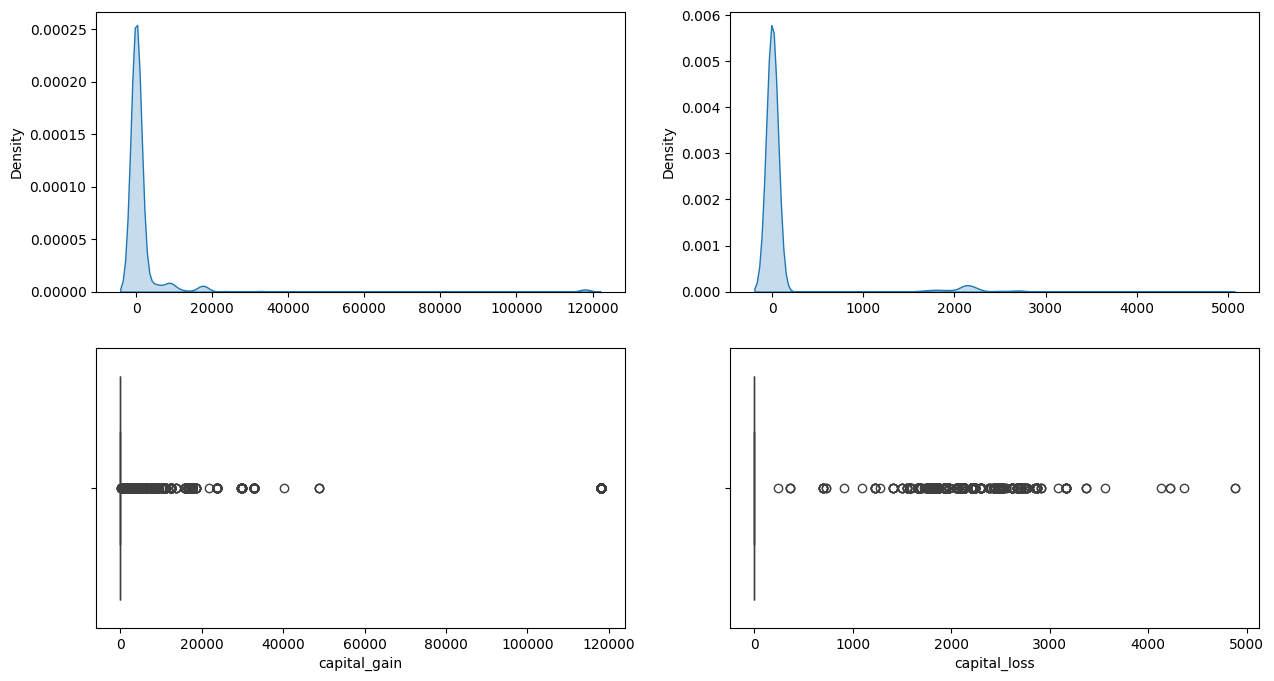

9.821629330989655
4.132877560210533


In [217]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
ax = ax.flatten()
sns.kdeplot(train.capital_gain, fill=True, ax=ax[0])
ax[0].set_xlabel('')

sns.kdeplot(train.capital_loss, fill=True, ax=ax[1])
ax[1].set_xlabel('')

sns.boxplot(x=train.capital_gain, ax=ax[2])
sns.boxplot(x=train.capital_loss, ax=ax[3])
plt.show()
print(train.capital_gain.skew())
print(train.capital_loss.skew())

In [218]:
def count_ouliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return ((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))).sum()

In [219]:
train[['capital_gain', 'capital_loss']].apply(count_ouliers)

capital_gain    2697
capital_loss    1422
dtype: int64

We can cluster the values of `capital_gain` and `capital_loss` columns to make them more useful in the analysis and modeling.

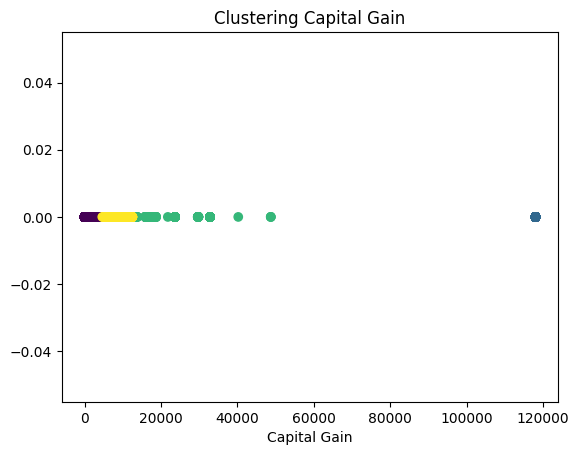

In [220]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(train['capital_gain'].values.reshape(-1, 1))

kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)

train['cluster_gain'] = kmeans.labels_

plt.scatter(train['capital_gain'], [0]*len(train), c=train['cluster_gain'], cmap='viridis')
plt.xlabel('Capital Gain')
plt.title('Clustering Capital Gain')
plt.show()


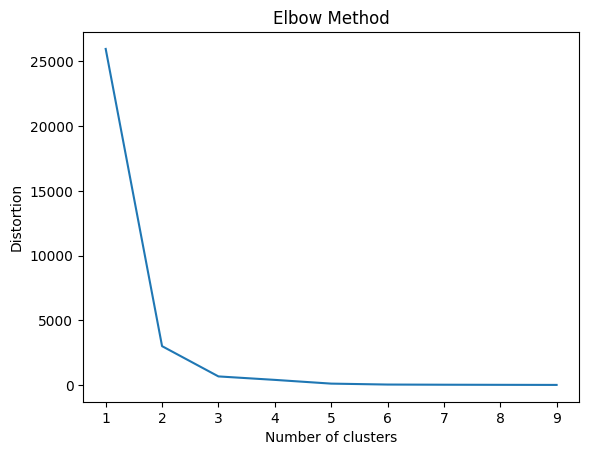

In [221]:
distortions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 10), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

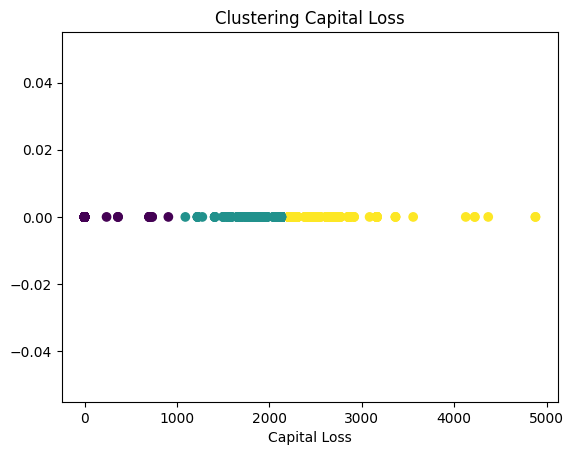

In [222]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_data = scaler.fit_transform(train['capital_loss'].values.reshape(-1, 1))

kmeans = KMeans(n_clusters=3)  
kmeans.fit(scaled_data)

train['cluster_loss'] = kmeans.labels_

# Visualize the clusters
plt.scatter(train['capital_loss'], [0]*len(train), c=train['cluster_loss'], cmap='viridis')
plt.xlabel('Capital Loss')
plt.title('Clustering Capital Loss')
plt.show()


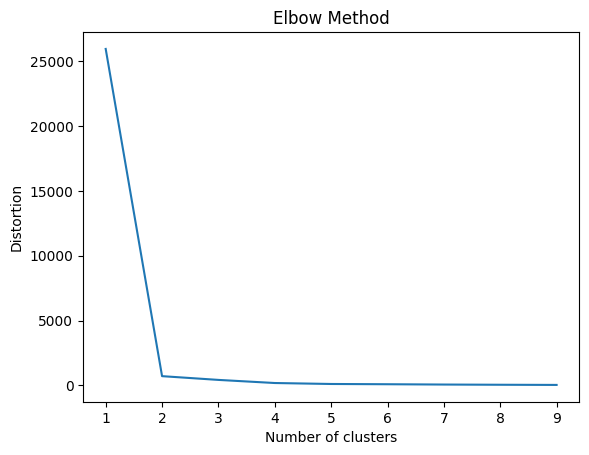

In [223]:
distortions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 10), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

2.6054130467505923
3.913296330751704


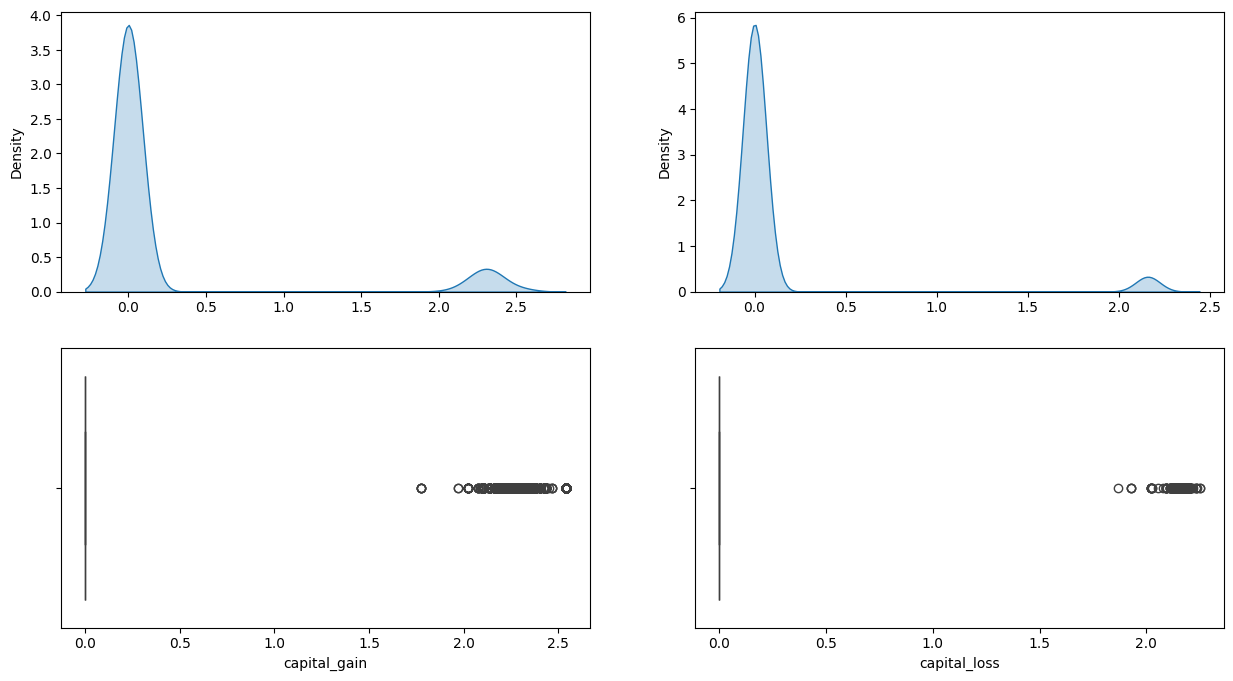

In [224]:
new_capital_gain = np.log1p(train.capital_gain)
new_capital_loss = np.log1p(train.capital_loss )

new_capital_gain = np.log1p(new_capital_gain)
new_capital_loss = np.log1p(new_capital_loss)

fig, ax = plt.subplots(2, 2, figsize=(15, 8))
ax = ax.flatten()
sns.kdeplot(new_capital_gain, fill=True, ax=ax[0])
ax[0].set_xlabel('')

sns.kdeplot(new_capital_loss, fill=True, ax=ax[1])
ax[1].set_xlabel('')

sns.boxplot(x=new_capital_gain, ax=ax[2])
sns.boxplot(x=new_capital_loss, ax=ax[3])

print(new_capital_gain.skew())
print(new_capital_loss.skew())

plt.show()

In [225]:
train.capital_gain = new_capital_gain
train.capital_loss = new_capital_loss

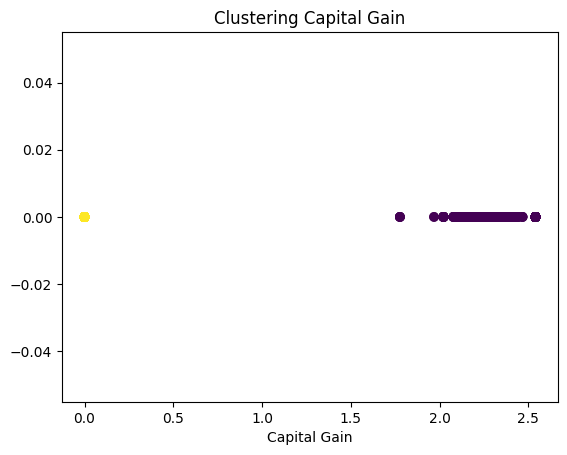

In [226]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the data (Optional but recommended)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train['capital_gain'].values.reshape(-1, 1))

# Using KMeans clustering
kmeans = KMeans(n_clusters=2)  # You can change the number of clusters
kmeans.fit(scaled_data)

# Add cluster labels to your data
train['cluster_gain_normalized'] = kmeans.labels_

# Visualize the clusters
plt.scatter(train['capital_gain'], [0]*len(train), c=train['cluster_gain_normalized'], cmap='viridis')
plt.xlabel('Capital Gain')
plt.title('Clustering Capital Gain')
plt.show()


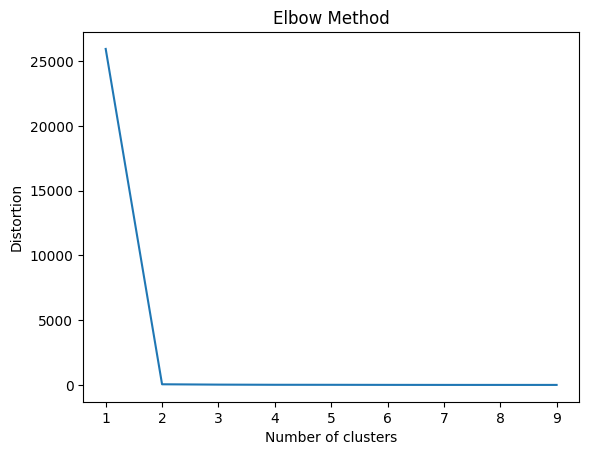

In [227]:
distortions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 10), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

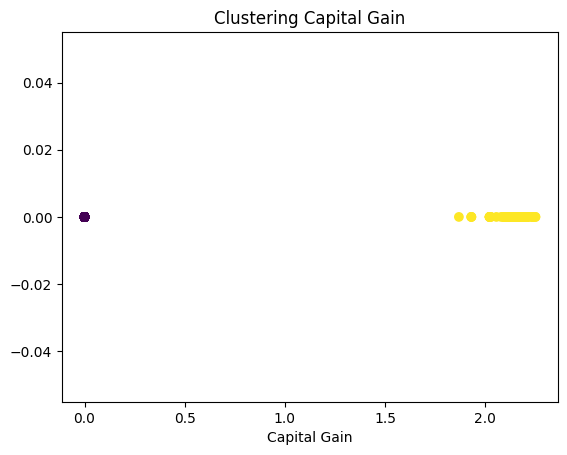

In [228]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the data (Optional but recommended)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train['capital_loss'].values.reshape(-1, 1))

# Using KMeans clustering
kmeans = KMeans(n_clusters=2)  # You can change the number of clusters
kmeans.fit(scaled_data)

# Add cluster labels to your data
train['cluster_loss_normalized'] = kmeans.labels_

# Visualize the clusters
plt.scatter(train['capital_loss'], [0]*len(train), c=train['cluster_loss_normalized'], cmap='viridis')
plt.xlabel('Capital Gain')
plt.title('Clustering Capital Gain')
plt.show()


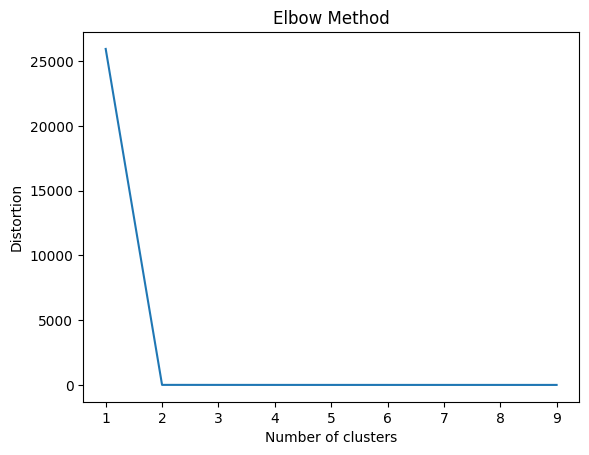

In [229]:
distortions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 10), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [230]:
print(train.capital_gain.isna().sum())
print(train.capital_loss.isna().sum())

0
0


We will process outliers later.

### Hours per week column

In [231]:
train.hours_per_week.value_counts(dropna=False)

hours_per_week
40.0    11918
50.0     2563
45.0     1551
60.0     1300
35.0      890
20.0      842
30.0      766
55.0      592
25.0      441
48.0      433
38.0      352
15.0      300
70.0      243
32.0      222
65.0      206
10.0      200
NaN       183
42.0      180
44.0      178
36.0      175
24.0      169
16.0      137
43.0      127
80.0      124
8.0       117
52.0      117
37.0      113
12.0      111
56.0       93
99.0       81
46.0       77
28.0       67
72.0       65
18.0       65
75.0       54
6.0        47
84.0       46
47.0       45
5.0        45
4.0        39
39.0       34
54.0       34
22.0       31
41.0       30
2.0        28
3.0        27
90.0       27
33.0       24
7.0        23
53.0       22
14.0       22
26.0       22
58.0       21
23.0       20
21.0       19
27.0       19
34.0       18
13.0       17
17.0       17
49.0       17
62.0       16
9.0        14
64.0       13
1.0        12
57.0       11
63.0       11
66.0       11
51.0       11
85.0       10
68.0        9
19.0 

In [232]:
train.head()

,age_years,workclass,final_weight,education,educational_num,marital_status,job_title,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income,married,cluster_gain,cluster_loss,cluster_gain_normalized,cluster_loss_normalized
0,32.0,private,5.611009,seventh_eighth_grade,4,married_civ_spouse,skilled_artisan,husband,white,male,0.0,0.0,40.0,United-States,0,1,0,0,1,0
1,68.0,self_emp_not_inc,5.148886,masters_degree,14,married_civ_spouse,logistics_transport,husband,white,male,0.0,0.0,15.0,United-States,0,1,0,0,1,0
2,50.0,private,5.164397,high_school_graduate,9,married_civ_spouse,skilled_artisan,husband,white,male,0.0,0.0,40.0,United-States,0,1,0,0,1,0
3,28.0,private,4.645579,high_school_graduate,9,never_married,security_personnel,unmarried,amer_indian_eskimo,female,0.0,0.0,40.0,United-States,0,0,0,0,1,0
4,43.0,private,5.235246,some_college,10,divorced,administrative_assistant,not_in_family,white,female,0.0,0.0,40.0,United-States,0,0,0,0,1,0


In [233]:
train.hours_per_week = train.hours_per_week.astype('str')

In [234]:
mode_hours_per_week = train.groupby(['job_title', 'workclass'])['hours_per_week'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
example = mode_hours_per_week.loc['unknown', 'private']
example

'40.0'

In [235]:
def fix_hours_per_week(row):
    if row['hours_per_week'] == 'nan':
        return mode_hours_per_week.loc[row['job_title'], row['workclass']]
    else:
        return row['hours_per_week']

In [236]:
train.hours_per_week = train.apply(fix_hours_per_week, axis=1)

In [237]:
train.hours_per_week.apply(isnan).sum()

0

In [238]:
train.head()

,age_years,workclass,final_weight,education,educational_num,marital_status,job_title,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income,married,cluster_gain,cluster_loss,cluster_gain_normalized,cluster_loss_normalized
0,32.0,private,5.611009,seventh_eighth_grade,4,married_civ_spouse,skilled_artisan,husband,white,male,0.0,0.0,40.0,United-States,0,1,0,0,1,0
1,68.0,self_emp_not_inc,5.148886,masters_degree,14,married_civ_spouse,logistics_transport,husband,white,male,0.0,0.0,15.0,United-States,0,1,0,0,1,0
2,50.0,private,5.164397,high_school_graduate,9,married_civ_spouse,skilled_artisan,husband,white,male,0.0,0.0,40.0,United-States,0,1,0,0,1,0
3,28.0,private,4.645579,high_school_graduate,9,never_married,security_personnel,unmarried,amer_indian_eskimo,female,0.0,0.0,40.0,United-States,0,0,0,0,1,0
4,43.0,private,5.235246,some_college,10,divorced,administrative_assistant,not_in_family,white,female,0.0,0.0,40.0,United-States,0,0,0,0,1,0


### Country of origin column

In [239]:
train.country_of_origin.value_counts(dropna=False)

country_of_origin
United-States                 23375
?                               458
Mexico                          431
Philippines                     170
Germany                         109
Canada                          107
India                            89
Puerto-Rico                      88
Cuba                             79
England                          73
China                            69
El-Salvador                      68
South                            68
Italy                            60
Dominican-Republic               57
Poland                           50
Japan                            49
Jamaica                          48
Columbia                         44
Vietnam                          40
Haiti                            38
Taiwan                           38
Portugal                         34
Guatemala                        32
Iran                             32
Greece                           28
France                           27
Peru      

In [240]:
train.country_of_origin = train.country_of_origin.apply(lambda x: x.strip().lower().replace('?', 'unknown').replace('-', '_'))

In [241]:
train.country_of_origin.value_counts(dropna=False)

country_of_origin
united_states                 23375
unknown                         458
mexico                          431
philippines                     170
germany                         109
canada                          107
india                            89
puerto_rico                      88
cuba                             79
england                          73
china                            69
el_salvador                      68
south                            68
italy                            60
dominican_republic               57
poland                           50
japan                            49
jamaica                          48
columbia                         44
vietnam                          40
haiti                            38
taiwan                           38
portugal                         34
guatemala                        32
iran                             32
greece                           28
france                           27
peru      

In [242]:
train.isna().sum()

age_years                  0
workclass                  0
final_weight               0
education                  0
educational_num            0
marital_status             0
job_title                  0
relationship               0
race                       0
gender                     0
capital_gain               0
capital_loss               0
hours_per_week             0
country_of_origin          0
income                     0
married                    0
cluster_gain               0
cluster_loss               0
cluster_gain_normalized    0
cluster_loss_normalized    0
dtype: int64

In [243]:
category_columns = ['marital_status', 'relationship', 'job_title',
                    'workclass', 'education',
                    'race', 'gender', 'country_of_origin']

train.age_years = train.age_years.astype('int')
train.educational_num = train.educational_num.astype('int')
train.hours_per_week = pd.to_numeric(train.hours_per_week).astype('int')

for column in category_columns:
    train[column] = train[column].astype('category')

In [244]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25948 entries, 0 to 25952
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age_years                25948 non-null  int32   
 1   workclass                25948 non-null  category
 2   final_weight             25948 non-null  float64 
 3   education                25948 non-null  category
 4   educational_num          25948 non-null  int32   
 5   marital_status           25948 non-null  category
 6   job_title                25948 non-null  category
 7   relationship             25948 non-null  category
 8   race                     25948 non-null  category
 9   gender                   25948 non-null  category
 10  capital_gain             25948 non-null  float64 
 11  capital_loss             25948 non-null  float64 
 12  hours_per_week           25948 non-null  int32   
 13  country_of_origin        25948 non-null  category
 14  income     

In [245]:
train.isna().sum()

age_years                  0
workclass                  0
final_weight               0
education                  0
educational_num            0
marital_status             0
job_title                  0
relationship               0
race                       0
gender                     0
capital_gain               0
capital_loss               0
hours_per_week             0
country_of_origin          0
income                     0
married                    0
cluster_gain               0
cluster_loss               0
cluster_gain_normalized    0
cluster_loss_normalized    0
dtype: int64

In [246]:
train.to_csv('train_cleaned.csv')

## Test data

In [247]:
test = pd.read_csv('test.csv', index_col='Unnamed: 0')
test.rename(columns={
        'educational-num': 'educational_num',
        'hours-per-week': 'hours_per_week',
        'capital-gain': 'capital_gain',
        'capital-loss': 'capital_loss',
        'marital-status': 'marital_status',
    }, inplace=True)

test.head()

,age_years,workclass,final_weight,education,educational_num,marital_status,job_title,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country_of_origin
0,41.0,Private,187336,high_school_graduate,9,Divorced,corporate_executive,Not-in-family,White,Female,0.0,0.0,40.0,United-States
1,78.0,?,143574,some_college,10,Widowed,unknown,Not-in-family,White,Male,0.0,0.0,5.0,United-States
2,23.0,Private,60847,associate_vocational,11,Never-married,business_development,Unmarried,White,Female,0.0,0.0,60.0,United-States
3,20.0,Private,113511,eleventh_grade,7,Never-married,logistics_transport,Own-child,White,Male,0.0,0.0,40.0,United-States
4,30.0,Private,205659,associate_academic,12,Married-civ-spouse,corporate_executive,Wife,White,Female,0.0,0.0,50.0,Thailand


In [248]:
test.isna().sum()

age_years            105
workclass            130
final_weight           0
education            372
educational_num        0
marital_status         0
job_title              0
relationship           0
race                  62
gender                 0
capital_gain           0
capital_loss           0
hours_per_week        50
country_of_origin      0
dtype: int64

In [249]:
group = test.groupby(['marital_status', 'relationship'])['age_years']

test.age_years = test.age_years.fillna(group.transform(lambda x: round(x.mean(), 0))) 

In [250]:
train.age_years.isna().sum()

0

In [251]:
test.workclass = test.workclass.astype('str')
test.workclass = test.workclass.apply(fix_workclass)
test.workclass.value_counts()

workclass
private             4478
self_emp_not_inc     539
local_gov            421
unknown              361
self_emp_inc         256
state_gov            235
federal_gov          192
without_pay            4
never_worked           2
slf_emp_inc            1
Name: count, dtype: int64

In [252]:
test.workclass = test.workclass.apply(lambda x: 'self_emp_inc' if x == 'slf_emp_inc' else x)
test.workclass.value_counts()

workclass
private             4478
self_emp_not_inc     539
local_gov            421
unknown              361
self_emp_inc         257
state_gov            235
federal_gov          192
without_pay            4
never_worked           2
Name: count, dtype: int64

In [253]:
print(test.final_weight.skew())
test.final_weight = np.log10(test.final_weight)
test.final_weight.skew()

1.2154759579037635


-0.8214763369993532

In [254]:
test.education = test.educational_num.map(mapping)
test.education.isna().sum()

0

In [255]:
test.marital_status = test.marital_status.apply(fix_marital_status)
test.marital_status.isna().sum()

0

In [256]:
test['married'] = test.marital_status.apply(lambda x: 1 if x in ['married_civ_spouse', 'married_spouse_absent', 'married_af_spouse'] else 0)
test.married.value_counts()

married
1    3476
0    3013
Name: count, dtype: int64

In [257]:
test.job_title = test.job_title.astype('category')
test.job_title.value_counts()

job_title
corporate_executive         932
specialized_professional    916
skilled_artisan             808
business_development        732
administrative_assistant    672
general_service_worker      590
unknown                     371
machine_operator            361
logistics_transport         304
manual_labor                256
agriculture_worker          197
technical_support           183
security_personnel          135
domestic_worker              27
military_personnel            5
Name: count, dtype: int64

In [258]:
test.relationship = test.relationship.apply(fix_relationship)
test.relationship.isna().sum()

0

In [259]:
test.race = test.race.astype('str')
test.race = test.race.apply(fix_race)
test.race.apply(isnan).sum()

0

In [260]:
test.gender = test.gender.str.lower()
test.gender.value_counts()

gender
male      4513
female    1976
Name: count, dtype: int64

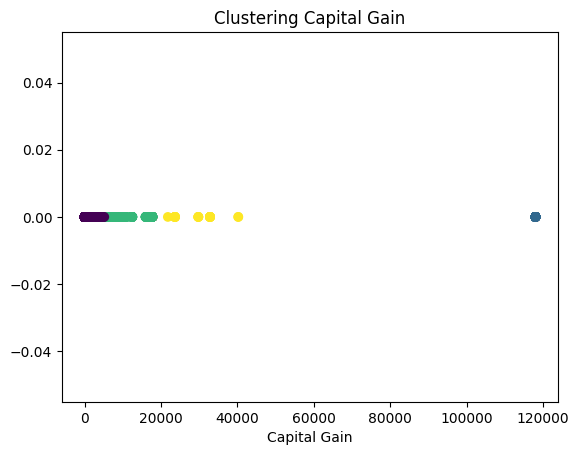

In [261]:
sc = StandardScaler()
scaled_data_test = sc.fit_transform(test['capital_gain'].values.reshape(-1, 1))

kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data_test)

test['cluster_gain'] = kmeans.labels_

plt.scatter(test['capital_gain'], [0]*len(test), c=test['cluster_gain'], cmap='viridis')
plt.xlabel('Capital Gain')
plt.title('Clustering Capital Gain')
plt.show()

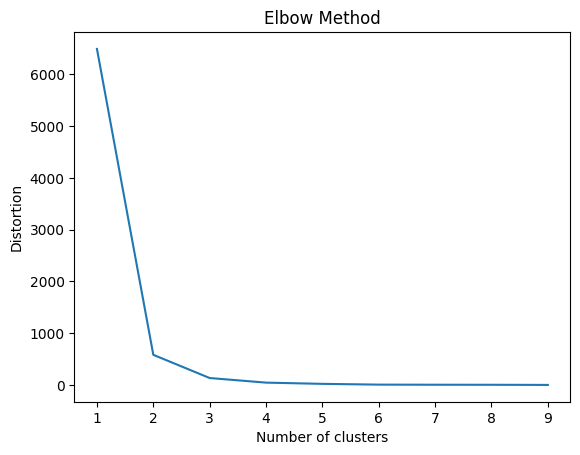

In [262]:
distortions_test = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data_test)
    distortions_test.append(kmeans.inertia_)
    
plt.plot(range(1, 10), distortions_test)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

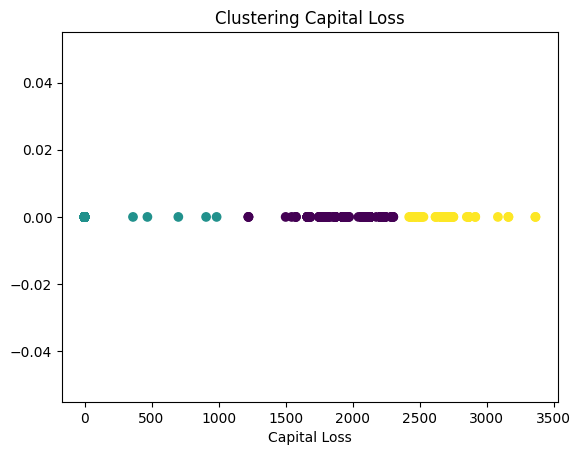

In [263]:
sc = StandardScaler()
scaled_data_test = sc.fit_transform(test['capital_loss'].values.reshape(-1, 1))

kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data_test)

test['cluster_loss'] = kmeans.labels_

plt.scatter(test['capital_loss'], [0]*len(test), c=test['cluster_loss'], cmap='viridis')
plt.xlabel('Capital Loss')
plt.title('Clustering Capital Loss')
plt.show()

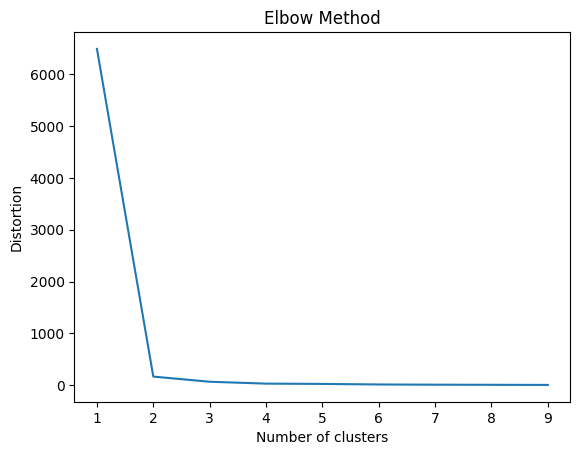

In [264]:
distortions_test = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data_test)
    distortions_test.append(kmeans.inertia_)
    
plt.plot(range(1, 10), distortions_test)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [265]:
for i in range(2):
    test.capital_gain = np.log1p(test.capital_gain)
    test.capital_loss = np.log1p(test.capital_loss)

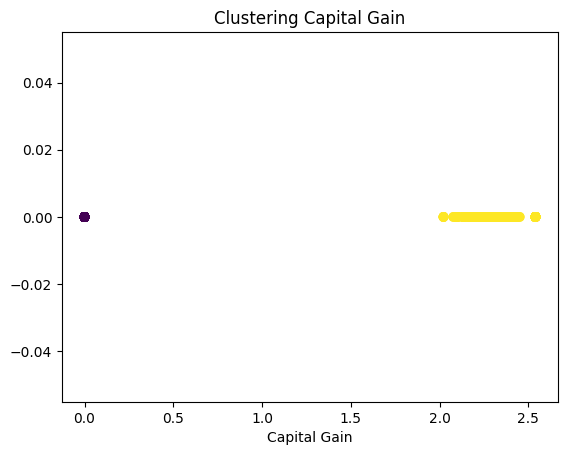

In [266]:
sc = StandardScaler()
scaled_data_test_normalized = sc.fit_transform(test['capital_gain'].values.reshape(-1, 1))

kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data_test_normalized)

test['cluster_gain_normalized'] = kmeans.labels_

plt.scatter(test['capital_gain'], [0]*len(test), c=test['cluster_gain_normalized'], cmap='viridis')
plt.xlabel('Capital Gain')
plt.title('Clustering Capital Gain')
plt.show()

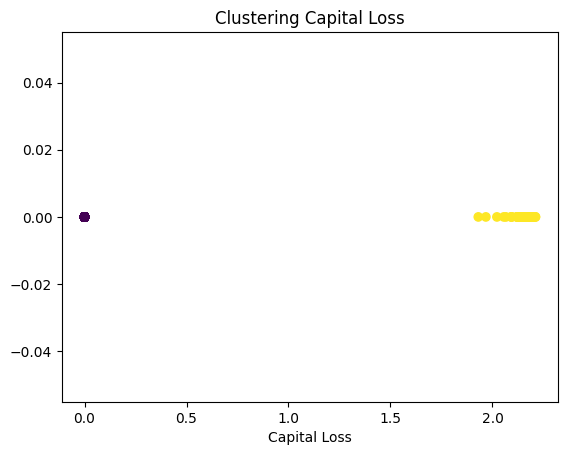

In [267]:
sc = StandardScaler()
scaled_data_test_normalized = sc.fit_transform(test['capital_loss'].values.reshape(-1, 1))

kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data_test_normalized)

test['cluster_loss_normalized'] = kmeans.labels_

plt.scatter(test['capital_loss'], [0]*len(test), c=test['cluster_loss_normalized'], cmap='viridis')
plt.xlabel('Capital Loss')
plt.title('Clustering Capital Loss')
plt.show()

In [268]:
test.cluster_gain.value_counts()

cluster_gain
0    6035
2     375
1      56
3      23
Name: count, dtype: int64

In [269]:
test.cluster_gain_normalized.value_counts()

cluster_gain_normalized
0    5826
1     663
Name: count, dtype: int64

In [270]:
test.cluster_loss.value_counts()

cluster_loss
1    6124
0     297
2      68
Name: count, dtype: int64

In [271]:
test.cluster_loss_normalized.value_counts()

cluster_loss_normalized
0    6119
1     370
Name: count, dtype: int64

In [272]:
test.hours_per_week = test.hours_per_week.astype('str')
mode_hours_per_week = test.groupby(['job_title', 'workclass'], observed=False)['hours_per_week'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
test.hours_per_week = test.apply(fix_hours_per_week, axis=1)
test.hours_per_week.apply(isnan).sum()

0

In [273]:
test.country_of_origin = test.country_of_origin.apply(lambda x: x.strip().lower().replace('?', 'unknown').replace('-', '_'))
test.country_of_origin.value_counts()

country_of_origin
united_states                 5846
mexico                         118
unknown                        115
philippines                     32
canada                          27
el_salvador                     26
germany                         26
india                           22
england                         22
puerto_rico                     19
china                           18
south                           16
cuba                            15
guatemala                       15
japan                           14
italy                           14
dominican_republic              13
taiwan                          12
vietnam                         11
poland                          11
haiti                           10
yugoslavia                       7
greece                           7
jamaica                          7
iran                             7
columbia                         6
portugal                         6
trinadad&tobago                  5
ec

In [274]:
test.age_years = test.age_years.astype('int')
test.educational_num = test.educational_num.astype('int')
test.hours_per_week = pd.to_numeric(test.hours_per_week).astype('int')
for column in category_columns:
    test[column] = test[column].astype('category')

test.isna().sum()

age_years                  0
workclass                  0
final_weight               0
education                  0
educational_num            0
marital_status             0
job_title                  0
relationship               0
race                       0
gender                     0
capital_gain               0
capital_loss               0
hours_per_week             0
country_of_origin          0
married                    0
cluster_gain               0
cluster_loss               0
cluster_gain_normalized    0
cluster_loss_normalized    0
dtype: int64

In [275]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6489 entries, 0 to 6488
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age_years                6489 non-null   int32   
 1   workclass                6489 non-null   category
 2   final_weight             6489 non-null   float64 
 3   education                6489 non-null   category
 4   educational_num          6489 non-null   int32   
 5   marital_status           6489 non-null   category
 6   job_title                6489 non-null   category
 7   relationship             6489 non-null   category
 8   race                     6489 non-null   category
 9   gender                   6489 non-null   category
 10  capital_gain             6489 non-null   float64 
 11  capital_loss             6489 non-null   float64 
 12  hours_per_week           6489 non-null   int32   
 13  country_of_origin        6489 non-null   category
 14  married      

In [276]:
test.to_csv('test_cleaned.csv')

## Modeling

First we will import all the libraries we want for the model.

In [277]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [278]:
# I was trying to drop columns and see how it affects the model, and at last I decided to drop these columns

train.drop(['educational_num','cluster_gain_normalized', 'cluster_loss_normalized'], axis=1, inplace=True)
test.drop(['educational_num', 'cluster_gain_normalized', 'cluster_loss_normalized'], axis=1, inplace=True)

In [279]:
# This step was to calculate the weights for the classes, so that I can try it in models

total_samples = train.income.value_counts().sum()
samples_0 = train.income.value_counts()[0]
samples_1 = train.income.value_counts()[1]
samples_0 = total_samples/samples_0
samples_1 = total_samples/samples_1

In [280]:
x = train.drop('income', axis=1)
y = train['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [281]:
sc = StandardScaler()
ohe = OneHotEncoder()

num_cols = x.select_dtypes(include='number').columns.tolist()
cat_cols = x.select_dtypes(exclude='number').columns.tolist()

num_transformer = Pipeline(steps=[
    ('scaler', sc)
])

cat_transformer = Pipeline(steps=[
    ('ohe', ohe)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [282]:
print(num_cols)
print(cat_cols)

['age_years', 'final_weight', 'capital_gain', 'capital_loss', 'hours_per_week', 'married', 'cluster_gain', 'cluster_loss']
['workclass', 'education', 'marital_status', 'job_title', 'relationship', 'race', 'gender', 'country_of_origin']


In [310]:
"""" 
After struggling with different models, CatBoost Classifier was the model wich gave us the best results, after it was Stacking Classifier model.
I tried to fine tune it and get best results but I really can't remember which were the right parameters for it, 
    so let's just focus now on the simple model :)
"""
cat = CatBoostClassifier(random_state=42, verbose=0)
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', cat)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
y_pred_proba = pipe.predict_proba(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Log Loss:', log_loss(y_test, y_pred_proba))
print("\n", classification_report(y_test, y_pred))

Accuracy: 0.8433526011560694
Log Loss: 0.324238658085517

               precision    recall  f1-score   support

           0       0.87      0.89      0.88      3273
           1       0.80      0.77      0.78      1917

    accuracy                           0.84      5190
   macro avg       0.83      0.83      0.83      5190
weighted avg       0.84      0.84      0.84      5190



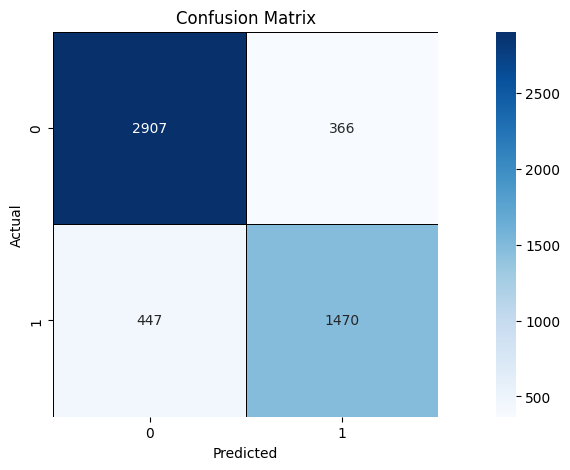

In [309]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', linewidths=0.5,
                            linecolor='black', cmap='Blues', square=True , ax=ax)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [311]:
pipe.fit(x, y)
y_pred = pipe.predict(test)

submission = pd.DataFrame({'ID': test.index, 'income': y_pred})
submission.to_csv('submission_cat.csv', index=False)

<center>
<br> <span style="font-family:Cambria; font-weight:bold;">Thank you for your upvote.</span><br>
<br> <span style="font-size:26px; font-family:Cambria; font-weight:bold;">Mohamed Kardosha</span>
</center>